# Проект: Исследование стартапов

## Введение

Цель исследования — изучить, какие факторы влияют на привлечение инвестиций стартапами и их дальнейшую успешность.

Описание этапов:
- Предварительная обработка данных: изучение структуры, типов данных и обработка пропусков.
- Анализ инвестиционных раундов и стратегий привлечения капитала.
- Оценка влияния финансирования на вероятность поглощения стартапа.
- Выявление ключевых характеристик успешных стартапов и фондов.
- Итоговый отчет с выводами и рекомендациями.




## Шаг 1. Знакомство с данными: загрузка и первичная предобработка

Названия файлов:
* acquisition.csv
* company_and_rounds.csv
* degrees.csv
* education.csv
* fund.csv
* investment.csv
* people.csv

Они находятся в папке datasets, если вы выполняете работу на платформе. В случае, если вы делаете работу локально, доступ к файлам в папке можно получить по адресу `https://code.s3.yandex.net/datasets/` + имя файла.

### 1.1. Вывод общей информации, исправление названия столбцов

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Загрузка данных
acquisition = pd.read_csv('https://code.s3.yandex.net/datasets/acquisition.csv')
company_and_rounds = pd.read_csv('https://code.s3.yandex.net/datasets/company_and_rounds.csv')
degrees = pd.read_csv('https://code.s3.yandex.net/datasets/degrees.csv')
education = pd.read_csv('https://code.s3.yandex.net/datasets/education.csv')
people = pd.read_csv('https://code.s3.yandex.net/datasets/people.csv')
investment = pd.read_csv('https://code.s3.yandex.net/datasets/investment.csv')
fund = pd.read_csv('https://code.s3.yandex.net/datasets/fund.csv')

In [3]:
acquisition.info()
acquisition.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


In [4]:
company_and_rounds.info()
company_and_rounds.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217471 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at            109956 non-null  object 
 5   closed  at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network  username      95534 non-null   object 
 8   country  code          108607 non-null  object 
 9   investment  rounds     217472 non-null  float64
 10  funding  rounds        217472 non-null  float64
 11  funding  total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding  round  id     52928 non-null   float64
 14  company  id            52928 non-nul

,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,...,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,10000.0,MYWEBBO,network_hosting,operating,2008-07-26,NaN,mywebbo.com,NaN,NaN,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,10001.0,THE Movie Streamer,games_video,operating,2008-07-26,NaN,themoviestreamer.com,NaN,NaN,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,10002.0,Synergie Media,advertising,operating,2007-06-27,NaN,synergie-media.com,NaN,MAR,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,10003.0,Green Basti Ecosystems,cleantech,operating,2008-08-20,NaN,NaN,NaN,IND,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,100042.0,HostNine,NaN,operating,NaN,NaN,hostnine.com,Hostnine,NaN,0.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
degrees.info()
degrees.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98389 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


In [6]:
education.info()
education.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


In [7]:
people.info()
people.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226700 non-null  object 
 2   last_name         226705 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN
5,100002,Keith,Kurzendoerfer,NaN,NaN
6,100006,Courtney,Homer,81558.0,jobsbostontech
7,100009,Eddy,Badrina,NaN,NaN
8,100010,Michael,Dadashyan,NaN,fbroulette
9,100011,Jeff,Grell,NaN,NaN


In [8]:
investment.info()
investment.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61403 entries, 0 to 61402
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   id                61403 non-null  int64
 1   funding_round_id  61403 non-null  int64
 2   company_id        61403 non-null  int64
 3   fund_id           61403 non-null  int64
dtypes: int64(4)
memory usage: 1.9 MB


,id,funding_round_id,company_id,fund_id
0,1,1,4,1
1,2,1,4,2
2,3,3,5,4
3,4,4,5,1
4,5,4,5,5


In [9]:
fund.info()
fund.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11652 entries, 0 to 11651
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  11652 non-null  int64 
 1   name                11649 non-null  object
 2   founded_at          4605 non-null   object
 3   domain              7362 non-null   object
 4   network_username    2149 non-null   object
 5   country_code        7053 non-null   object
 6   investment_rounds   11652 non-null  int64 
 7   invested_companies  11652 non-null  int64 
 8   milestones          11652 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 819.4+ KB


,id,name,founded_at,domain,network_username,country_code,investment_rounds,invested_companies,milestones
0,13131,NaN,NaN,NaN,NaN,NaN,0,0,0
1,1,Greylock Partners,1965-01-01,greylock.com,greylockvc,USA,307,196,0
2,10,Mission Ventures,1996-01-01,missionventures.com,NaN,USA,58,33,0
3,100,"Kapor Enterprises, Inc.",NaN,kei.com,NaN,USA,2,1,0
4,1000,Speed Ventures,NaN,NaN,NaN,NaN,0,0,1



* Проверьте названия столбцов.

In [10]:
company_and_rounds.columns

Index(['company  ID', 'name', 'category  code', 'status', 'founded  at',
       'closed  at', 'domain', 'network  username', 'country  code',
       'investment  rounds', 'funding  rounds', 'funding  total', 'milestones',
       'funding  round  id', 'company  id', 'funded  at',
       'funding  round  type', 'raised  amount', 'pre  money  valuation',
       'participants', 'is  first  round', 'is  last  round'],
      dtype='object')

In [11]:
def col_to_snake_case(df):
    df.columns = df.columns.str.strip().str.replace(r"\s+", "_", regex=True)
    return df


In [12]:
company_and_rounds = col_to_snake_case(company_and_rounds)
company_and_rounds.columns

Index(['company_ID', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_id', 'funded_at', 'funding_round_type',
       'raised_amount', 'pre_money_valuation', 'participants',
       'is_first_round', 'is_last_round'],
      dtype='object')

In [13]:
# Выведем только два столбца: company_id и name из объединенного датафрейма
company_and_rounds[['company_ID','company_id']].head(20)

,company_ID,company_id
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0
3,10.0,NaN
4,100.0,NaN
5,10000.0,NaN
6,10001.0,NaN
7,10002.0,NaN
8,10003.0,NaN
9,100042.0,NaN


Заметна анамалия в данных. В таблице company_and_rounds есть два стольбца 'company ID' и 'company id'. Эта анамалия требует анализа, для выявления причины ее появления. Данные либо дублируются, либо отсутствуют в одном из столбцов

### 1.2. Смена типов и анализ пропусков

* Обработайте типы данных в столбцах, которые хранят значения даты и времени, если это необходимо.

In [14]:
acquisition['acquired_at'] = pd.to_datetime(acquisition['acquired_at'])

company_and_rounds['founded_at'] = pd.to_datetime(company_and_rounds['founded_at'])
company_and_rounds['closed_at'] = pd.to_datetime(company_and_rounds['closed_at'])
company_and_rounds['funded_at'] = pd.to_datetime(company_and_rounds['funded_at'])

education['graduated_at'] = pd.to_datetime(education['graduated_at']) 

fund['founded_at'] = pd.to_datetime(fund['founded_at']) 

acquisition.info()
company_and_rounds.info()
education.info()
fund.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9407 non-null   int64         
 1   acquiring_company_id  9407 non-null   int64         
 2   acquired_company_id   9407 non-null   int64         
 3   term_code             1831 non-null   object        
 4   price_amount          9407 non-null   int64         
 5   acquired_at           9378 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 441.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_ID           217472 non-null  float64       
 1   name                 217471 non-null  object        
 2   category_co


* Оцените полноту данных — сделайте предварительный вывод, достаточно ли данных для решения задач проекта.

In [15]:
acquisition.isna().sum() / acquisition.shape[0] * 100

id                       0.000000
acquiring_company_id     0.000000
acquired_company_id      0.000000
term_code               80.535771
price_amount             0.000000
acquired_at              0.308281
dtype: float64

In [16]:
company_and_rounds.isna().sum() / company_and_rounds.shape[0] * 100

company_ID              0.138676
name                    0.139135
category_code          33.928752
status                  0.138676
founded_at             49.509124
closed_at              98.416248
domain                 32.425818
network_username       56.131586
country_code           50.128574
investment_rounds       0.138676
funding_rounds          0.138676
funding_total           0.138676
milestones              0.138676
funding_round_id       75.695905
company_id             75.695905
funded_at              75.809784
funding_round_type     75.695905
raised_amount          75.695905
pre_money_valuation    75.695905
participants           75.695905
is_first_round         75.695905
is_last_round          75.695905
dtype: float64

In [17]:
education.isna().sum() / education.shape[0] * 100

id               0.000000
person_id        0.000000
instituition     0.050178
graduated_at    47.035854
dtype: float64

In [18]:
people.isna().sum() / people.shape[0] * 100

id                   0.000000
first_name           0.003970
last_name            0.001764
company_id          84.731528
network_username    82.855996
dtype: float64

In [19]:
degrees.isna().sum() / degrees.shape[0] * 100

id              0.000000
object_id       0.000000
degree_type    10.237205
subject        25.829760
dtype: float64

In [20]:
fund.isna().sum() / fund.shape[0] * 100

id                     0.000000
name                   0.025747
founded_at            60.478888
domain                36.817714
network_username      81.556814
country_code          39.469619
investment_rounds      0.000000
invested_companies     0.000000
milestones             0.000000
dtype: float64

In [21]:
investment.isna().sum() / investment.shape[0] * 100

id                  0.0
funding_round_id    0.0
company_id          0.0
fund_id             0.0
dtype: float64

Выполненные исправления:
- Убраны пробелы и приведены к нижнему регистру.
- Заменены пробелы на подчеркивания (_), но в company_and_rounds они превратились в двойные подчеркивания, исправлено.

Даты преобразованы в datetime в таблицах:
- acquisition["acquired_at"]
- education["graduated_at"]
- fund["founded_at"]
 - В company_and_rounds колонки с датами (founded_at, closed_at, funded_at)

Вывод:
- Данных достаточно для решения задач, но анализ будет ограничен высокой долей пропусков в company_and_rounds и education.

- Рекомендуется удаление или заполнение пропусков в ключевых переменных (founded_at, funded_at, raised_amount) для повышения качества выводов

## Шаг 2. Предобработка данных, предварительное исследование


### 2.1. Раунды финансирования по годам

Задание необходимо выполнить без объединения и дополнительной предобработки на основе датасета `company_and_rounds.csv`.

* Составьте сводную таблицу по годам, в которой на основании столбца `raised_amount` для каждого года указан:

  * типичный размер средств, выделяемый в рамках одного раунда;
  * общее количество раундов финансирования за этот год.

* Оставьте в таблице информацию только для тех лет, для которых есть информация о более чем 50 раундах финансирования.

* На основе получившейся таблицы постройте график, который будет отражать динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования.

На основе полученных данных ответьте на вопросы:

* В каком году типичный размер собранных в рамках одного раунда средств был максимален?

* Какая тенденция по количеству раундов и выделяемых в рамках каждого раунда средств наблюдалась в 2013 году?

In [22]:
company_and_rounds['funded_year'] = company_and_rounds['funded_at'].dt.year 
pivot_year = pd.pivot_table(
   company_and_rounds,
    index=['funded_year'],
    values=['raised_amount', 'funded_at'],
    aggfunc={'raised_amount': 'median', 'funded_at': 'count'})

pivot_year = pivot_year[pivot_year['funded_at'] > 50]

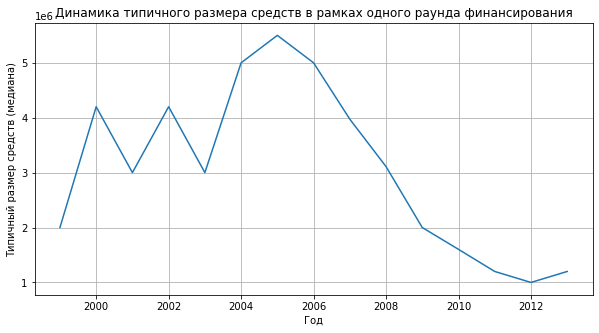

In [23]:
plt.figure(figsize=(10, 5))

plt.plot(pivot_year.index, pivot_year["raised_amount"])

plt.xlabel("Год")
plt.ylabel("Типичный размер средств (медиана)")
plt.title("Динамика типичного размера средств в рамках одного раунда финансирования")
plt.grid(True)

Выводы по анализу раундов финансирования

- Максимальный типичный размер средств в одном раунде был зафиксирован в 2005 году.

Тенденция в 2013 году:

- Медианный размер средств в одном раунде финансирования составил 1 200 000 долларов.
- Количество раундов было 11072, что говорит о высокой инвестиционной активности.
- Видно падение размера инвестиций по сравнению с предыдущими годами, но при этом большое количество раундов, что может указывать на увеличение количества стартапов, но снижение размера финансирования.


### 2.2. Люди и их образование

Заказчик хочет понять, зависит ли полнота сведений о сотрудниках (например, об их образовании) от размера компаний.

* Оцените, насколько информация об образовании сотрудников полна. Используя датасеты `people.csv` и `education.csv`, разделите все компании на несколько групп по количеству сотрудников и оцените среднюю долю сотрудников без информации об образовании в каждой из групп. Обоснуйте выбранные границы групп.

* Оцените, возможно ли для выполнения задания присоединить к этим таблицам ещё и таблицу `degrees.csv`.

In [24]:
people_with_education = people.merge(education, left_on="id", right_on="person_id", how="left")

# Создание признака наличия информации об образовании
people_with_education["has_education"] = people_with_education["instituition"].notna()

people_with_education.isna().sum()/ len(people_with_education) * 100

id_x                 0.000000
first_name           0.003362
last_name            0.001494
company_id          83.268583
network_username    81.032447
id_y                59.260947
person_id           59.260947
instituition        59.281119
graduated_at        78.448901
has_education        0.000000
dtype: float64

In [25]:
company_sizes = people_with_education.groupby('company_id')['id_x'].count().reset_index().rename(columns={"id_x": "employee_count"})

In [26]:
company_sizes.describe()

,company_id,employee_count
count,22922.000000,22922.000000
mean,102688.472646,1.953974
std,84842.926930,4.087373
min,1.000000,1.000000
25%,28844.500000,1.000000
50%,70878.500000,1.000000
75%,174083.500000,2.000000
max,286091.000000,376.000000


In [27]:
# Подсчет доли сотрудников без данных об образовании в каждой компании
company_education_stats = (
    people_with_education.groupby("company_id")["has_education"]
    .mean()
    .reset_index()
    .rename(columns={"has_education": "no_education_ratio"})
)

In [28]:
company_analysis = company_sizes.merge(company_education_stats, on="company_id", how="left")

In [29]:
company_analysis['employee_group'] = pd.cut(company_analysis['employee_count'], bins=[0, 1, 10, 50, 100], labels=["Микро (1 сотрудник)", "Малые (2-10)", "Средние (11-50)", "Крупные (51+)"])
company_analysis

,company_id,employee_count,no_education_ratio,employee_group
0,1.0,3,0.666667,Малые (2-10)
1,2.0,1,1.000000,Микро (1 сотрудник)
2,3.0,5,0.800000,Малые (2-10)
3,4.0,18,0.944444,Средние (11-50)
4,5.0,84,0.809524,Крупные (51+)
...,...,...,...,...
22917,285897.0,2,1.000000,Малые (2-10)
22918,285953.0,1,0.000000,Микро (1 сотрудник)
22919,285972.0,2,0.500000,Малые (2-10)
22920,285996.0,1,1.000000,Микро (1 сотрудник)


In [30]:
# Группировка по размеру компании и расчет средней доли сотрудников без образования
education_by_size = company_analysis.groupby("employee_group")["no_education_ratio"].mean().reset_index()
education_by_size

/tmp/ipykernel_77/3054207360.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  education_by_size = company_analysis.groupby("employee_group")["no_education_ratio"].mean().reset_index()


,employee_group,no_education_ratio
0,Микро (1 сотрудник),0.407138
1,Малые (2-10),0.758444
2,Средние (11-50),0.702030
3,Крупные (51+),0.813168


**Выбранные границы групп**

- В компаниях работает от 1 до 376 сотрудников

- Медиана 1, половина компаний имеет только 1 сотрудника

- 75% процентиль 2 сотрудника 

Можно предположить, что большая часть компаний скорей всего индивидуальные предприниматели или Микро компании.

Определение групп по количеству сотрудников:

- Микро-компании (1 сотрудник) – составляют более 50% всех компаний.
- Малые компании (2–10 сотрудников) – включает компании с выше среднего числа сотрудников.
- Средние компании (11–50 сотрудников) – заметно реже встречаются.
- Крупные компании (51+ сотрудников) – редкие случаи, но могут показать другую динамику.


**Вывод**

Чем больше компания, тем выше доля сотрудников без данных об образовании

- В микро-компаниях (1 сотрудник) информация отсутствует в 40,7% случаев.
- В малых компаниях (2–10 сотрудников) доля сотрудников без информации об образовании составляет 75,8%.
- В средних компаниях (11–50 сотрудников) этот показатель немного снижается до 70,2%.
- В крупных компаниях (51+ сотрудников) отсутствует информация у 81,3% сотрудников.


**Оцените, возможно ли для выполнения задания присоединить к этим таблицам ещё и таблицу degrees.csv?**

Возможно, для этого нужно преобразовать столбец `object_id` (идентификатор сотрудника) из таблицы degrees.csv. 
А именно удалить "p:", после можно объеденить по столбцу `person_id` из таблицы education.csv

### 2.3. Объединять или не объединять — вот в чём вопрос

Некоторые названия столбцов встречаются в датасетах чаще других. И, например, в результате предварительной проверки датасетов было выяснено, что столбец `company_id` подходит для объединения данных, так как большая часть значений встречается в разных датасетах не один, а несколько раз. Этот столбец может быть использован для объединения данных.

* Установите, подходит ли для объединения данных столбец `network_username`, который встречается в нескольких датасетах. Нам необходимо понимать, дублируется ли для разных датасетов информация в столбцах с таким названием, и если да — то насколько часто.

* Оцените, можно ли использовать столбцы с именем `network_username` для объединения данных.

Столбец `network_username` есть в  двух датасетах: people и fund

In [31]:
num_unique_people = people['network_username'].nunique() 
num_unique_people

38421

In [32]:
people['network_username'].count() - people['network_username'].nunique() 

np.int64(446)

In [33]:
num_unique_fund = fund['network_username'].nunique()
num_unique_fund

2098

In [34]:
fund['network_username'].count() - fund['network_username'].nunique()

np.int64(51)

In [35]:
# Выбираем только столбцы network_username из датасетов, где он присутствует
people_usernames = people[['network_username']].dropna()
fund_usernames = fund[['network_username']].dropna()

# Определяем пересечения значений
common_usernames = set(people_usernames['network_username']) & set(fund_usernames['network_username'])

# Подсчет количества пересечений
num_common = len(common_usernames)

# Рассчет доли пересечений
people_intersection_rate = round(num_common / num_unique_people *100, 2)
fund_intersection_rate = round(num_common / num_unique_fund *100, 2)


In [36]:
len(common_usernames)

79

In [37]:
people_intersection_rate

0.21

In [38]:
fund_intersection_rate

3.77

**Вывод по анализу пересечений network_username**

Общее количество уникальных network_username:
- В people.csv – 38 421 уникальных значений.
- В fund.csv – 2 098 уникальных значений.

Число пересечений (общие network_username в обоих датасетах):
- Всего 79 совпадающих значений между people.csv и fund.csv.

Процент пересечений:
- В people.csv пересечения составляют всего 0,2% (очень мало).
- В fund.csv пересечения составляют 3,8% (немного больше, но тоже небольшая доля).

**Можно ли использовать network_username для объединения данных?**

Нет, network_username плохо подходит для объединения, потому что:
- Мало пересечений между people.csv и fund.csv (всего 79 случаев).
- Различные значения в датасетах – network_username используется в каждом файле отдельно и не соединяет их напрямую.



### 2.4. Проблемный датасет и причина возникновения пропусков

Во время собственного анализа данных у заказчика больше всего вопросов возникло к датасету `company_and_rounds.csv`. В нём много пропусков как раз в информации о раундах, которая заказчику важна. Хотя информация об общем объёме финансирования по раундам присутствует в других датасетах, заказчик считает данные `company_and_rounds.csv` о размере средств наиболее верными.

* Любым удобным способом приведите данные в вид, который позволяет проводить анализ в разрезе отдельных компаний. Можно изменять форму данных, порядок их хранения. Обратите внимание на структуру датасета, порядок и названия столбцов, проанализируйте значения.

По гипотезе заказчика данные по компаниям из этой таблицы раньше хранились иначе, более удобным для исследования образом.

* Максимальным образом сохраняя данные, сохранив их связность и исключив возможные возникающие при этом ошибки, подготовьте данные так, чтобы удобно было отобрать компании по параметрам и рассчитать показатели из расчёта на одну компанию.

In [39]:
# Создание датасета с информацией о компаниях
companies_df = company_and_rounds[["company_id", "name", "category_code", "status", "founded_at", 
                        "closed_at", "domain", "network_username", "country_code", 
                        "investment_rounds", "funding_rounds", "funding_total", "milestones"]].drop_duplicates()

In [40]:
companies_df.shape[0]

196750

In [41]:
# Создание датасета с информацией о раундах финансирования
rounds_df = company_and_rounds[["funding_round_id", "company_id", "funded_at", "funding_round_type", 
                     "raised_amount", "pre_money_valuation", "participants", "is_first_round", 
                     "is_last_round"]].dropna()

In [42]:
rounds_df.shape[0]

52680

In [43]:
companies_df['company_id'].nunique(), companies_df['company_id'].count()

(31939, np.int64(31939))

In [44]:
companies_df.info()
companies_df.head(20)

<class 'pandas.core.frame.DataFrame'>
Index: 196750 entries, 0 to 217773
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   company_id         31939 non-null   float64       
 1   name               196517 non-null  object        
 2   category_code      123179 non-null  object        
 3   status             196518 non-null  object        
 4   founded_at         91223 non-null   datetime64[ns]
 5   closed_at          2620 non-null    datetime64[ns]
 6   domain             126537 non-null  object        
 7   network_username   80587 non-null   object        
 8   country_code       87988 non-null   object        
 9   investment_rounds  196518 non-null  float64       
 10  funding_rounds     196518 non-null  float64       
 11  funding_total      196518 non-null  float64       
 12  milestones         196518 non-null  float64       
dtypes: datetime64[ns](2), float64(5), object(6)
memor

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
3,NaN,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,0.0
4,NaN,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,0.0,0.0,4.0
5,NaN,MYWEBBO,network_hosting,operating,2008-07-26,NaT,mywebbo.com,NaN,NaN,0.0,0.0,0.0,0.0
6,NaN,THE Movie Streamer,games_video,operating,2008-07-26,NaT,themoviestreamer.com,NaN,NaN,0.0,0.0,0.0,0.0
7,NaN,Synergie Media,advertising,operating,2007-06-27,NaT,synergie-media.com,NaN,MAR,0.0,0.0,0.0,0.0
8,NaN,Green Basti Ecosystems,cleantech,operating,2008-08-20,NaT,NaN,NaN,IND,0.0,0.0,0.0,0.0
9,NaN,HostNine,NaN,operating,NaT,NaT,hostnine.com,Hostnine,NaN,0.0,0.0,0.0,1.0
10,NaN,Thomas Publishing,advertising,operating,NaT,NaT,thomaspublishing.com,NaN,USA,0.0,0.0,0.0,1.0
11,NaN,Vetter Idea Management System,enterprise,operating,2011-08-01,NaT,getvetter.com,getvetter,NaN,0.0,0.0,0.0,1.0


In [45]:
rounds_df['company_id'].nunique(), rounds_df['company_id'].count()

(31735, np.int64(52680))

In [46]:
rounds_df.info()
rounds_df.head(20)

<class 'pandas.core.frame.DataFrame'>
Index: 52680 entries, 0 to 217773
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   funding_round_id     52680 non-null  float64       
 1   company_id           52680 non-null  float64       
 2   funded_at            52680 non-null  datetime64[ns]
 3   funding_round_type   52680 non-null  object        
 4   raised_amount        52680 non-null  float64       
 5   pre_money_valuation  52680 non-null  float64       
 6   participants         52680 non-null  float64       
 7   is_first_round       52680 non-null  float64       
 8   is_last_round        52680 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 4.0+ MB


,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
15,1644.0,1001.0,2008-02-26,series-a,5000000.0,0.0,3.0,1.0,1.0
20,6682.0,10014.0,2008-09-01,angel,0.0,0.0,1.0,1.0,1.0
21,3619.0,10015.0,2008-10-10,series-a,2000000.0,0.0,2.0,0.0,1.0
22,18213.0,10015.0,2010-09-10,series-b,9000000.0,0.0,4.0,0.0,0.0
23,27747.0,10015.0,2012-01-24,series-c+,12000000.0,0.0,4.0,0.0,0.0
24,45409.0,10015.0,2013-08-13,series-c+,43000000.0,0.0,5.0,1.0,0.0
25,54006.0,10015.0,2012-01-01,venture,2069200.0,0.0,4.0,0.0,0.0


In [47]:
merged_df = rounds_df.merge(companies_df, on="company_id", how="inner")


In [48]:
merged_df.shape[0]

52680

In [49]:
merged_df.head()

,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,name,...,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0,Wetpaint,...,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
1,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0,Wetpaint,...,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
2,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0,Wetpaint,...,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
3,1644.0,1001.0,2008-02-26,series-a,5000000.0,0.0,3.0,1.0,1.0,FriendFeed,...,acquired,2007-10-01,NaT,friendfeed.com,friendfeed,USA,0.0,1.0,5000000.0,3.0
4,6682.0,10014.0,2008-09-01,angel,0.0,0.0,1.0,1.0,1.0,Mobclix,...,acquired,2008-03-01,NaT,mobclix.com,mobclix,USA,0.0,1.0,0.0,4.0



## Шаг 3. Исследовательский анализ объединённых таблиц

<big>Приступите к шагу 3 после проверки ревьюера.</big>


### 3.1. Объединение данных

Объедините данные для ответа на вопросы заказчика, которые касаются интересующих его компаний.

В качестве основы для объединённой таблицы возьмите данные из обработанного датасета `company_and_rounds.csv` — выберите только те компании, у которых указаны значения `funding_rounds` или `investment_rounds` больше нуля, и те, у которых в колонке `status` указано `acquired`.

Далее работайте только с этими данными.

In [50]:
merged_df["status"].unique()

array(['operating', 'acquired', 'closed', 'ipo', nan], dtype=object)

In [51]:
new_df = merged_df[
    ((merged_df["investment_rounds"] > 0) |
    (merged_df["funding_rounds"] > 0)) |
    (merged_df["status"] == "acquired")
]

In [52]:
len(new_df)

52382


### 3.2. Анализ выбросов

Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.

* По предобработанному столбцу `funding_total` графическим способом оцените, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся.

* В процессе расчёта значений обратите внимание, например, на показатели, возвращаемые методом `.describe()`, — объясните их. Применимы ли к таким данным обычные способы нахождения типичных значений?

In [53]:
new_df["funding_total"].describe()

count    5.238200e+04
mean     2.486910e+07
std      9.731058e+07
min      0.000000e+00
25%      6.283962e+05
50%      4.600000e+06
75%      2.070000e+07
max      5.700000e+09
Name: funding_total, dtype: float64

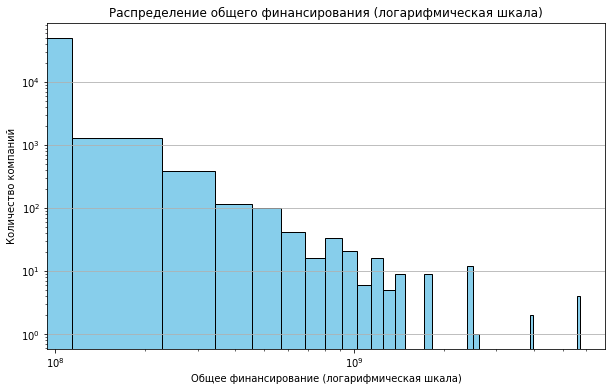

In [54]:
# Построим гистограмму для оценки распределения общего финансирования
plt.figure(figsize=(10, 6))
plt.hist(new_df['funding_total'], bins=50, color='skyblue', edgecolor='black', log=True)
plt.xscale('log')  # Логарифмическая шкала по оси X
plt.xlabel('Общее финансирование (логарифмическая шкала)')
plt.ylabel('Количество компаний')
plt.title('Распределение общего финансирования (логарифмическая шкала)')
plt.grid(axis='y')

Text(0.5, 0, 'USD')

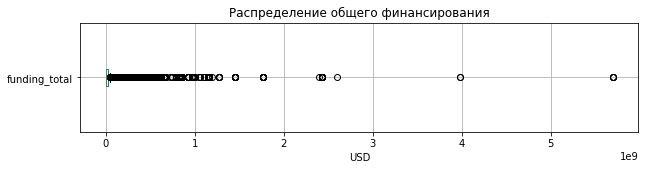

In [55]:
boxplot = new_df.boxplot(column='funding_total',
                     vert=False, 
                     figsize=(10, 2))

# Добавляем заголовок и метку оси X
boxplot.set_title('Распределение общего финансирования')
boxplot.set_xlabel('USD')

**Для таких данных медиана — лучший показатель типичного значения, чем среднее.**

Медиана (50%): $12,000,000 — половина компаний получила меньше этой суммы. Это более надёжный показатель «типичного» значения, чем среднее.

**Распределение данных с сильным правым «хвостом» указывает на наличие немногих, но очень крупных компаний с экстремальным финансированием.**

Максимальное значение (max): $5,700,000,000 — явный выброс, сильно превышающий другие значения.


### 3.3. Куплены забесплатно?

* Исследуйте компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования.

* Рассчитайте аналитически верхнюю и нижнюю границу выбросов для столбца `funding_total` и укажите, каким процентилям границы соответствуют. Учитывая озвученные выше предпосылки и собственные соображения, сделайте выводы о корректности планируемой заказчиком замены нижней и верхней границы выбросов на значения, рассчитанные по процентилям.

In [56]:
new_acquisition = new_df.merge(acquisition, left_on='company_id', right_on='acquired_company_id', how='left')

In [57]:
len(new_acquisition)

52475

In [58]:
new_acquisition.head()

,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,name,...,investment_rounds,funding_rounds,funding_total,milestones,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0,Wetpaint,...,0.0,3.0,39750000.0,5.0,NaN,NaN,NaN,NaN,NaN,NaT
1,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0,Wetpaint,...,0.0,3.0,39750000.0,5.0,NaN,NaN,NaN,NaN,NaN,NaT
2,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0,Wetpaint,...,0.0,3.0,39750000.0,5.0,NaN,NaN,NaN,NaN,NaN,NaT
3,1644.0,1001.0,2008-02-26,series-a,5000000.0,0.0,3.0,1.0,1.0,FriendFeed,...,0.0,1.0,5000000.0,3.0,1901.0,5.0,1001.0,cash_and_stock,47500000.0,2009-08-10
4,6682.0,10014.0,2008-09-01,angel,0.0,0.0,1.0,1.0,1.0,Mobclix,...,0.0,1.0,0.0,4.0,3878.0,23054.0,10014.0,NaN,0.0,2010-09-30


In [59]:
filter_acquisition = new_acquisition[((new_acquisition['price_amount'] == 0) | (new_acquisition['price_amount'] == 1)) & (new_acquisition['funding_total'] != 0)]

In [60]:
filter_acquisition.head()

,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,name,...,investment_rounds,funding_rounds,funding_total,milestones,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
30,3268.0,10054.0,2008-08-26,series-c+,26000000.0,0.0,6.0,0.0,0.0,Jumptap,...,0.0,7.0,121500000.0,3.0,9288.0,23283.0,10054.0,cash_and_stock,0.0,2013-08-13
31,3269.0,10054.0,2005-03-01,series-a,4000000.0,0.0,2.0,0.0,1.0,Jumptap,...,0.0,7.0,121500000.0,3.0,9288.0,23283.0,10054.0,cash_and_stock,0.0,2013-08-13
32,3270.0,10054.0,2005-12-06,series-b,17000000.0,0.0,3.0,0.0,0.0,Jumptap,...,0.0,7.0,121500000.0,3.0,9288.0,23283.0,10054.0,cash_and_stock,0.0,2013-08-13
33,3271.0,10054.0,2006-10-04,series-c+,22000000.0,0.0,4.0,0.0,0.0,Jumptap,...,0.0,7.0,121500000.0,3.0,9288.0,23283.0,10054.0,cash_and_stock,0.0,2013-08-13
34,22253.0,10054.0,2011-04-01,venture,20000000.0,0.0,6.0,0.0,0.0,Jumptap,...,0.0,7.0,121500000.0,3.0,9288.0,23283.0,10054.0,cash_and_stock,0.0,2013-08-13


In [61]:
# Расчет границ выбросов для funding_total
Q1 = filter_acquisition['funding_total'].quantile(0.25)
Q3 = filter_acquisition['funding_total'].quantile(0.75)
IQR = Q3 - Q1
Q1, Q3, IQR

(np.float64(3000000.0), np.float64(25089300.0), np.float64(22089300.0))

In [62]:
# Верхняя и нижняя границы выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound,upper_bound

(np.float64(-30133950.0), np.float64(58223250.0))

In [63]:
upper_percentile = (filter_acquisition['funding_total'] > upper_bound).mean() * 100

upper_percentile

np.float64(7.1779744346116034)

In [64]:
x = filter_acquisition['funding_total'].quantile(0.99)
x

np.float64(235024000.0)

In [65]:
y = (filter_acquisition['funding_total'] > x).mean() * 100
y

np.float64(0.950508030154048)

In [66]:
lower_percentile = 0.0
upper_percentile = 0.99

**Нижняя граница:**
- Значение: $0 (так как фактическое значение отрицательное, что невозможно для финансирования).
- Процентиль: 0% — все значения выше этой границы, выбросов нет.

**Верхняя граница:**

При расчете верхней границы выбросов,  доля выбросов составила 7.2% инвестиций, чтобы учесть естественные колебания в данных и не удалять значимые случаи крупных инвестиций, рекомендуется установить границу:
- Значение: $235024000.0
- Процентиль: 0.99 % — значения выше этой границы, доля выбросов составила меньше 1 процента (0.95%).


### 3.4. Цены стартапов по категориям

Категории стартапов с наибольшими ценами и значительным разбросом цен могут быть наиболее привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. Среди категорий стартапов выделите категории стартапов, характеризующиеся:

* наибольшими ценами;
* и наибольшим разбросом цен за стартап.

Объясните, почему решили составить топ именно из такого числа категорий и почему рассчитывали именно так.

In [67]:
new_acquisition["category_code"].unique()

array(['web', 'mobile', 'health', 'cleantech', 'analytics', 'education',
       'medical', 'manufacturing', 'biotech', 'games_video', 'enterprise',
       'ecommerce', 'software', 'advertising', 'news', 'government',
       'other', 'security', 'finance', 'hardware', 'network_hosting',
       'photo_video', 'travel', 'search', 'public_relations', 'social',
       'transportation', nan, 'hospitality', 'sports', 'nonprofit',
       'fashion', 'messaging', 'music', 'consulting', 'semiconductor',
       'design', 'legal', 'real_estate', 'automotive', 'nanotech', 'pets',
       'local'], dtype=object)

In [68]:
new_acquisition['price_amount'].describe()

count    4.934000e+03
mean     9.427101e+07
std      3.930548e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.100000e+07
max      8.500000e+09
Name: price_amount, dtype: float64

In [69]:
new_acquisition = new_acquisition[new_acquisition['price_amount'] > 0]

In [70]:
category_stats = new_acquisition.groupby('category_code').agg({
    'price_amount': ['count','mean', 'median','std']
}).reset_index()

category_stats 

category_code price_amount                                          
                            count          mean        median           std
0        advertising          110  1.721082e+08  8.000000e+07  2.456230e+08
1          analytics           14  1.837143e+08  2.000000e+08  7.325554e+07
2         automotive            1  4.300000e+07  4.300000e+07           NaN
3            biotech          181  3.638342e+08  2.850000e+08  3.495542e+08
4          cleantech           48  2.137281e+08  1.200000e+08  2.519679e+08
5         consulting           13  2.153077e+08  2.950000e+08  9.446109e+07
6          ecommerce           28  2.284268e+08  2.325000e+08  2.137950e+08
7          education            1  1.000000e+07  1.000000e+07           NaN
8         enterprise          125  3.242138e+08  1.670000e+08  3.720423e+08
9            fashion            2  2.700000e+08  2.700000e+08  0.000000e+00
10           finance           20  4.675200e+08  1.700000e+08  6.139132e+08
11       games_video           90  2.565263e+08  1.170000e+08  5.901822e+08
12          hardware           47  2.229723e+08  9.600000e+07  2.918775e+08
13            health            9  1.655556e+08  1.500000e+08  9.408920e+07
14       hospitality            2  1.000000e+07  1.000000e+07  0.000000e+00
15     manufacturing            4  6.325000e+07  4.350000e+07  6.437585e+07
16           medical            6  1.677500e+08  1.650000e+08  1.543029e+08
17         messaging           10  1.179000e+08  1.355000e+08  6.241341e+07
18            mobile          160  1.662668e+08  7.200000e+07  2.091223e+08
19             music            7  4.140857e+07  1.000000e+06  1.052188e+08
20   network_hosting           79  4.288403e+08  1.000000e+08  7.444130e+08
21              news           20  1.288750e+08  9.000000e+07  1.231334e+08
22             other           16  9.968750e+07  3.600000e+07  1.172756e+08
23       photo_video           15  2.393940e+08  5.000000e+07  3.991601e+08
24  public_relations           47  2.036596e+08  3.200000e+07  4.669282e+08
25       real_estate            5  2.520000e+07  4.000000e+07  2.026573e+07
26            search           19  1.137000e+08  1.000000e+08  1.208719e+08
27          security           39  1.888679e+08  1.500000e+08  1.889326e+08
28     semiconductor           60  3.597017e+08  1.230000e+08  8.955819e+08
29            social           12  9.700000e+07  1.080000e+08  5.883529e+07
30          software          235  4.627085e+08  7.400000e+07  1.341435e+09
31    transportation            3  1.100000e+09  1.100000e+09  0.000000e+00
32            travel            5  7.400000e+07  1.200000e+08  6.298809e+07
33               web          180  2.234561e+08  7.470000e+07  3.712279e+08

In [71]:
category_stats.columns = ['category', 'count_pr', 'average_price', 'median_price','price_std_dev']
category_stats.head()

,category,count_pr,average_price,median_price,price_std_dev
0,advertising,110,1.721082e+08,80000000.0,2.456230e+08
1,analytics,14,1.837143e+08,200000000.0,7.325554e+07
2,automotive,1,4.300000e+07,43000000.0,NaN
3,biotech,181,3.638342e+08,285000000.0,3.495542e+08
4,cleantech,48,2.137281e+08,120000000.0,2.519679e+08


In [72]:
category_stats.columns

Index(['category', 'count_pr', 'average_price', 'median_price',
       'price_std_dev'],
      dtype='object')

In [73]:
category_stats = category_stats.dropna(subset=['average_price', 'median_price','price_std_dev'])

In [74]:
category_stats = category_stats[category_stats['count_pr'] > 9]
category_stats

,category,count_pr,average_price,median_price,price_std_dev
0,advertising,110,1.721082e+08,80000000.0,2.456230e+08
1,analytics,14,1.837143e+08,200000000.0,7.325554e+07
3,biotech,181,3.638342e+08,285000000.0,3.495542e+08
4,cleantech,48,2.137281e+08,120000000.0,2.519679e+08
5,consulting,13,2.153077e+08,295000000.0,9.446109e+07
6,ecommerce,28,2.284268e+08,232500000.0,2.137950e+08
8,enterprise,125,3.242138e+08,167000000.0,3.720423e+08
10,finance,20,4.675200e+08,170000000.0,6.139132e+08
11,games_video,90,2.565263e+08,117000000.0,5.901822e+08
12,hardware,47,2.229723e+08,96000000.0,2.918775e+08


In [75]:
# Топ-5 категорий с наибольшими средними ценами
top_average_price = category_stats.sort_values(by='average_price', ascending=False)
top_average_price.head(5)

,category,count_pr,average_price,median_price,price_std_dev
10,finance,20,4.675200e+08,170000000.0,6.139132e+08
30,software,235,4.627085e+08,74000000.0,1.341435e+09
20,network_hosting,79,4.288403e+08,100000000.0,7.444130e+08
3,biotech,181,3.638342e+08,285000000.0,3.495542e+08
28,semiconductor,60,3.597017e+08,123000000.0,8.955819e+08


In [76]:
# Топ-5 категорий с наибольшими медианами цен
top_average_price = category_stats.sort_values(by='median_price', ascending=False)
top_average_price.head(5)

,category,count_pr,average_price,median_price,price_std_dev
5,consulting,13,2.153077e+08,295000000.0,9.446109e+07
3,biotech,181,3.638342e+08,285000000.0,3.495542e+08
6,ecommerce,28,2.284268e+08,232500000.0,2.137950e+08
1,analytics,14,1.837143e+08,200000000.0,7.325554e+07
10,finance,20,4.675200e+08,170000000.0,6.139132e+08


In [77]:
# Топ-5 категорий с наибольшим разбросом цен (стандартное отклонение)
top_price_std_dev = category_stats.sort_values(by='price_std_dev', ascending=False).head(5)
top_price_std_dev

,category,count_pr,average_price,median_price,price_std_dev
30,software,235,4.627085e+08,74000000.0,1.341435e+09
28,semiconductor,60,3.597017e+08,123000000.0,8.955819e+08
20,network_hosting,79,4.288403e+08,100000000.0,7.444130e+08
10,finance,20,4.675200e+08,170000000.0,6.139132e+08
11,games_video,90,2.565263e+08,117000000.0,5.901822e+08


**Мы выделили топ-5 категорий, так как это позволяет:**
- Сосредоточиться на наиболее значимых данных без излишней детализации.
- Охватить ключевые категории, которые привлекают крупных инвесторов.
- Топ-5 — это стандартный подход, который помогает выявить основные тренды.

**Почему выбрали именно эти метрики:**

Средняя цена (mean): показывает общую привлекательность категории с точки зрения стоимости стартапов.

Стандартное отклонение (std): показывает разброс цен, что важно для инвесторов, готовых к риску ради высокой прибыли.

**Топ по средним ценам:**

Категории вроде finance, software, и network_hosting — привлекательны для инвесторов, ищущих стабильные, крупные сделки.

**Топ по разбросу цен:**

Категории software, semiconductor и network_hosting показывают высокий риск, но могут предложить огромную прибыль в случае успеха.


### 3.5. Сколько раундов продержится стартап перед покупкой

* Необходимо проанализировать столбец `funding_rounds`. Исследуйте значения столбца. Заказчика интересует типичное значение количества раундов для каждого возможного статуса стартапа.

* Постройте график, который отображает, сколько в среднем раундов финансирования проходило для стартапов из каждой группы. Сделайте выводы.

In [78]:
merged_df['funding_rounds'].unique()

array([ 3.,  1.,  5.,  2.,  7.,  4.,  6.,  8., 10.,  9., 13., 11., 15.,
       14., 12., nan])

In [79]:
merged_df = merged_df.dropna(subset=['funding_rounds'])

In [80]:
merged_df['funding_rounds'].unique()

array([ 3.,  1.,  5.,  2.,  7.,  4.,  6.,  8., 10.,  9., 13., 11., 15.,
       14., 12.])

In [81]:
funding_rounds_stats = merged_df.groupby('status')['funding_rounds'].agg(['count', 'mean', 'median', 'std', 'min', 'max']).dropna()
funding_rounds_stats

,count,mean,median,std,min,max
status,,,,,,
acquired,4898,2.762148,2.0,1.787341,1.0,12.0
closed,2816,1.902699,1.0,1.350921,1.0,8.0
ipo,1237,4.474535,4.0,3.174847,1.0,13.0
operating,43431,2.495798,2.0,1.869400,1.0,15.0


In [82]:
median_funding_rounds = merged_df.groupby('status')['funding_rounds'].median().dropna()
median_funding_rounds

status
acquired     2.0
closed       1.0
ipo          4.0
operating    2.0
Name: funding_rounds, dtype: float64

In [83]:
average_funding_rounds = merged_df.groupby('status')['funding_rounds'].mean().dropna().sort_values(ascending=False)
average_funding_rounds

status
ipo          4.474535
acquired     2.762148
operating    2.495798
closed       1.902699
Name: funding_rounds, dtype: float64

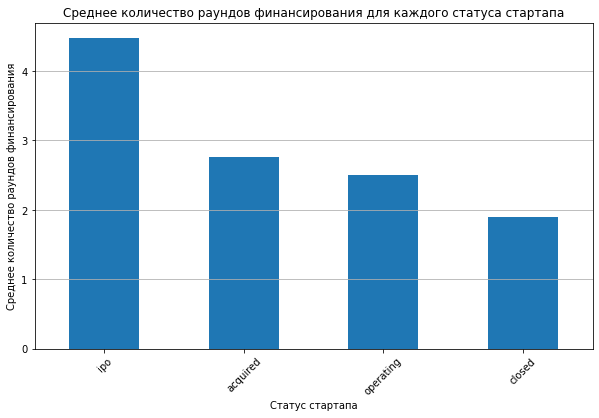

In [84]:
plt.figure(figsize=(10, 6))
average_funding_rounds.plot(kind='bar')
plt.title('Среднее количество раундов финансирования для каждого статуса стартапа')
plt.xlabel('Статус стартапа')
plt.ylabel('Среднее количество раундов финансирования')
plt.xticks(rotation=45)
plt.grid(axis='y')

**1. Acquired (Приобретённые стартапы)**
- Большинство стартапов проходят около 2 раундов финансирования. Небольшое стандартное отклонение указывает на то, что данные достаточно стабильны. Такие стартапы обычно быстро демонстрируют потенциал для роста.

**2. Closed (Закрывшиеся стартапы)**
- Большинство стартапов проходят всего 1 раунд финансирования

**3. IPO (Стартапы, вышедшие на IPO)**
- Большинство стартапов проходят около 4 раунда финансирования. Высокое стандартное отклонение показывает, что существуют как компании с небольшим количеством раундов, так и те, которые проходят через множество раундов.

**4. Operating (Действующие стартапы)**
- Для действующих стартапов типичное количество раундов финансирования — около 2. Однако имеются стартапов с большим количеством раундов (до 15).

**Общие выводы:**

- Типичное (медианное) количество раундов финансирования для большинства стартапов — от 1 до 4, в зависимости от их статуса.
- Стартапы, которые выходят на IPO, проходят больше раундов (медиана = 4), чем те, которые были приобретены (медиана = 2) или закрылись (медиана = 1).
- Закрывшиеся стартапы чаще всего не могут привлечь больше одного раунда инвестиций.
- Для действующих стартапов характерно умеренное количество раундов (2), что указывает на активное, но не чрезмерное финансирование.

**Основные наблюдения:**

- Стартапы, которые остаются успешными (IPO или приобретение), обычно проходят больше раундов финансирования.
- Закрывшиеся компании чаще всего не могут привлечь финансирование на более поздних этапах.
- Действующие компании находятся в активной фазе развития и привлекают инвестиции для дальнейшего роста.


## Шаг 4. Итоговый вывод и рекомендации


#### Этап 1: Знакомство с данными и первичная обработка
Вывод:
- Предварительная обработка выявила высокую долю пропусков в некоторых датасетах (например, в данных об образовании), но данных было достаточно для проведения анализа. Были определены ключевые параметры для последующего исследования.

#### Этап 2: Исследовательский анализ данных
2.1. Анализ инвестиционных раундов по годам
Динамика финансирования:
- Анализ показал, что максимальный медианный размер инвестиций в один раунд был зафиксирован в 2005 году.
Тенденции:
- В 2013 году наблюдалась высокая инвестиционная активность: несмотря на снижение медианного размера инвестиций, количество раундов значительно увеличилось. Это может свидетельствовать о росте числа стартапов и усилении конкуренции за инвестиции.

2.2. Связь между размером компании и полнотой данных об образовании сотрудников
Группировка компаний:
- Компании были разделены на группы по размеру: микро-, малые, средние и крупные компании.
Вывод:
Чем больше компания, тем меньше данных о её сотрудниках. В микро-компаниях информация об образовании доступна чаще, что может быть связано с меньшим количеством сотрудников и упрощённым документооборотом.

2.3. Проверка связи по столбцу network_username
Результаты:
- Было установлено, что столбец network_username имеет крайне низкую долю пересечений между разными датасетами (менее 1%), что делает его неэффективным для объединения данных.
Вывод:
- Для объединения данных целесообразно использовать более универсальные ключи, такие как company_id или person_id.

#### Этап 3: Углубленный анализ объединённых данных
3.1. Объединение данных о компаниях и инвестициях
- Для анализа были объединены данные о стартапах, раундах финансирования и сделках по их приобретению.
Фокус на стартапах со статусом acquired:
- Выделены компании с активными инвестиционными раундами и успешным результатом в виде приобретения.

3.2. Анализ выбросов в данных о финансировании
Распределение финансирования:
- Обнаружено наличие выбросов с экстремально большими суммами инвестиций, что характерно для технологических стартапов с высоким потенциалом роста.
- Для идентификации выбросов использовался межквартильный размах (IQR), что позволило установить границы для типичных значений.

3.3. Анализ компаний, проданных за символическую стоимость
- Обнаружены компании, которые были проданы за ноль или один доллар при наличии значительного объема привлечённого финансирования. 

3.4. Категории стартапов с наибольшими инвестициями
Лидеры по инвестициям:

- Категории finance, software, и network_hosting показали наибольший средний размер инвестиций.
Разброс инвестиций:
- Категории, такие как software, semiconductor и network_hosting, продемонстрировали высокий разброс сумм инвестиций, что свидетельствует о высокой волатильности рынка в этих отраслях.

3.5. Количество раундов финансирования до покупки стартапа
Ключевые результаты:
- Стартапы, вышедшие на IPO: в среднем проходят 4 раунда финансирования.
- Приобретённые стартапы: в среднем проходят 2 раунда.
- Закрывшиеся стартапы: обычно ограничиваются 1 раундом, что может говорить о нехватке доверия со стороны инвесторов.
- Действующие стартапы: демонстрируют умеренный рост с 2 раундами в среднем.

**Основные выводы и взаимосвязь результатов**

Инвестиции и успех стартапа:
- Чем больше раундов финансирования проходит стартап, тем выше вероятность его успешного выхода на IPO или приобретения. Это подтверждается как анализом инвестиционных данных, так и изучением категорий стартапов с наибольшим количеством инвестиций.

Закрывшиеся компании:
- Низкое количество раундов и отсутствие дальнейшего финансирования часто указывают на неудачную бизнес-модель или проблемы с продуктом.

Секторные различия:
- Отрасли с высоким уровнем инноваций, такие как биотехнологии и финансы, привлекают больше инвестиций и демонстрируют больший разброс в оценке компаний.

Выбросы:
- Обнаруженные выбросы в данных подтверждают наличие стартапов-«единорогов», которые получают экстремально большие суммы финансирования.

**Рекомендации:**

- Расширить набор метрик для сотрудников анализа (карьерный опыт, навыки)
- Сформировать эталонные наборы данных для сравнения итогов.
- Провести дополнительный анализ макроэкономических факторов, влияющих на динамику рынка.
- Расширить набор метрик для оценки успеха (выручка, прибыль)..
- Рассмотрение особых случаев (сделки за $1).


**Заключение**
Проект предоставил глубокое понимание факторов, влияющих на успешность стартапов. Результаты анализа подтверждают ключевые гипотезы о важности количества раундов финансирования и роли отраслевой специфики. Полученные данные можно использовать для разработки стратегий привлечения инвестиций и оценки перспектив стартапов на рынке.